In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import numpy as np
%matplotlib inline

### Color Selection

In [105]:
image = mpimage.imread('test.jpg')
print("This image is: {} with dimensions: {}".format(type(image), image.shape))

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [106]:
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image) # color
region_select = np.copy(image) # region masking
line_image = np.copy(image) # combining color and region masking

In [107]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [108]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
             | (image[:,:,1] < rgb_threshold[1]) \
             | (image[:,:,2] < rgb_threshold[2])

In [109]:
color_select[color_thresholds] = [0,0,0]

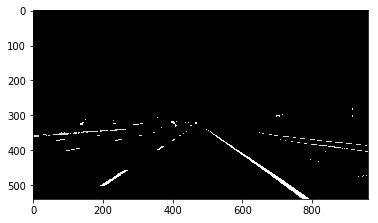

In [110]:
plt.imshow(color_select);

### Region masking

In [111]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [830, 550]
apex = [500, 320]

In [112]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [113]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

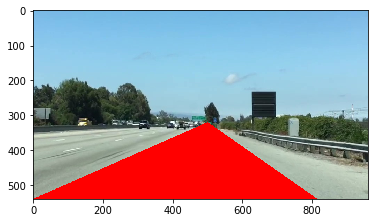

In [114]:
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

### Combining Color and Region masking

In [115]:
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

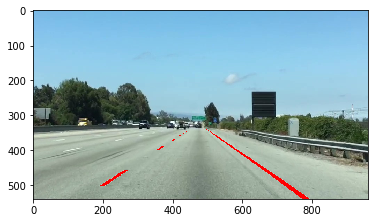

In [116]:
# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)